In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import scipy.stats as st
from CleaningFunctions import Clean
import matplotlib.pyplot as plt
%matplotlib inline


ImportError: cannot import name 'Clean'

In [243]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [244]:
# Read in data as pandas dataframe

df=pd.read_csv("2016_2019_USmovies_API.csv")
df.head()

# Check what our column titles are so we can rename/remove them
df.columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 22 columns):
tconst                      2015 non-null object
titleType                   2015 non-null object
primaryTitle                2015 non-null object
originalTitle               2015 non-null object
isAdult                     2015 non-null int64
startYear                   2015 non-null int64
endYear                     2015 non-null object
runtimeMinutes              2015 non-null int64
genres                      2015 non-null object
title                       2015 non-null object
check                       2015 non-null int64
averageRating               2015 non-null float64
numVotes                    2015 non-null int64
budget_LCY                  1004 non-null object
gross_USA_USD               1085 non-null float64
cumm_worldwide_gross_USD    1386 non-null float64
Released_Date               2005 non-null object
Released_Month              2005 non-null float64
Rotten_Tomat

In [245]:
# Let's clean the data and rename columns so we know what we're looking at

columns=["tconst","title","isAdult","startYear","runtimeMinutes","check","averageRating","genres","numVotes",
         "budget_LCY","gross_USA_USD","cumm_worldwide_gross_USD",]
names=["Title_ID","Title","Adult","Release_Year","Runtime(Minutes)","Check","Rating","Genre","Number_of_Votes",
      "Budget(LCY)","USA_Gross($)","Worldwide_Gross($)"]

for column,name in list(zip(columns,names)):
    df.rename(columns={column:name},inplace=True)
    
df.head()

,Title_ID,titleType,primaryTitle,originalTitle,Adult,Release_Year,endYear,Runtime(Minutes),Genre,Title,...,Number_of_Votes,Budget(LCY),USA_Gross($),Worldwide_Gross($),Released_Date,Released_Month,Rotten_Tomatoes,Metascore,Actors,Production
0,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama,The Other Side of the Wind,...,4989,NaN,NaN,NaN,02 Nov 2018,11.0,83.0,78.0,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",Netflix
1,tt0339736,movie,The Evil Within,The Evil Within,0,2017,\N,98,Horror,The Evil Within,...,2572,$6000000,NaN,NaN,30 Aug 2017,8.0,100.0,NaN,"Sean Patrick Flanery, Dina Meyer, Frederick Ko...",NaN
2,tt0360556,movie,Fahrenheit 451,Fahrenheit 451,0,2018,\N,100,"Drama,Sci-Fi,Thriller",Fahrenheit 451,...,15295,NaN,NaN,NaN,20 May 2018,5.0,32.0,NaN,"Michael B. Jordan, Aaron Davis, Cindy Katz, Mi...",HBO Films
3,tt0365545,movie,Nappily Ever After,Nappily Ever After,0,2018,\N,98,"Comedy,Drama,Romance",Nappily Ever After,...,6718,NaN,NaN,NaN,21 Sep 2018,9.0,71.0,63.0,"Sanaa Lathan, Ricky Whittle, Lyriq Bent, Lynn ...",Netflix
4,tt0369610,movie,Jurassic World,Jurassic World,0,2015,\N,124,"Action,Adventure,Sci-Fi",Jurassic World,...,549806,$150000000,652.27,1670.4,12 Jun 2015,6.0,72.0,59.0,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Universal Pictures


In [246]:
df.columns

Index(['Title_ID', 'titleType', 'primaryTitle', 'originalTitle', 'Adult',
       'Release_Year', 'endYear', 'Runtime(Minutes)', 'Genre', 'Title',
       'Check', 'Rating', 'Number_of_Votes', 'Budget(LCY)', 'USA_Gross($)',
       'Worldwide_Gross($)', 'Released_Date', 'Released_Month',
       'Rotten_Tomatoes', 'Metascore', 'Actors', 'Production'],
      dtype='object')

In [247]:
# Now to drop columns we aren't interested in or that hold irrelevant data

df=df.drop(columns=["titleType","primaryTitle","originalTitle","endYear","Adult","Check"])

df.head()

# df.to_csv("Full_OMDB_Table.csv",index=False)

,Title_ID,Release_Year,Runtime(Minutes),Genre,Title,Rating,Number_of_Votes,Budget(LCY),USA_Gross($),Worldwide_Gross($),Released_Date,Released_Month,Rotten_Tomatoes,Metascore,Actors,Production
0,tt0069049,2018,122,Drama,The Other Side of the Wind,6.9,4989,NaN,NaN,NaN,02 Nov 2018,11.0,83.0,78.0,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",Netflix
1,tt0339736,2017,98,Horror,The Evil Within,5.5,2572,$6000000,NaN,NaN,30 Aug 2017,8.0,100.0,NaN,"Sean Patrick Flanery, Dina Meyer, Frederick Ko...",NaN
2,tt0360556,2018,100,"Drama,Sci-Fi,Thriller",Fahrenheit 451,4.9,15295,NaN,NaN,NaN,20 May 2018,5.0,32.0,NaN,"Michael B. Jordan, Aaron Davis, Cindy Katz, Mi...",HBO Films
3,tt0365545,2018,98,"Comedy,Drama,Romance",Nappily Ever After,6.4,6718,NaN,NaN,NaN,21 Sep 2018,9.0,71.0,63.0,"Sanaa Lathan, Ricky Whittle, Lyriq Bent, Lynn ...",Netflix
4,tt0369610,2015,124,"Action,Adventure,Sci-Fi",Jurassic World,7.0,549806,$150000000,652.27,1670.4,12 Jun 2015,6.0,72.0,59.0,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Universal Pictures


In [252]:
# Now to check our data makes sense and we have no nulls
print(df.describe())
print(df.info())
print(df.shape)

       Release_Year  Runtime(Minutes)       Rating  Number_of_Votes  \
count   2015.000000       2015.000000  2015.000000      2015.000000   
mean    2016.715633        101.181141     5.920447     42005.702233   
std        1.355422         15.783114     1.051272     91376.330598   
min     2014.000000         46.000000     1.400000       984.000000   
25%     2016.000000         90.000000     5.300000      2377.500000   
50%     2017.000000         98.000000     6.000000      7601.000000   
75%     2018.000000        109.000000     6.600000     36685.500000   
max     2019.000000        209.000000    10.000000    844981.000000   

       USA_Gross($)  Worldwide_Gross($)  Released_Month  Rotten_Tomatoes  \
count   1085.000000         1386.000000     2005.000000      1522.000000   
mean      46.304341           91.579856        6.684788        55.818660   
std       91.560188          225.040751        3.378692        28.335085   
min        0.000000            0.000000        1.000000 

In [253]:
# Drop columns which contain nulls as they aren't relevant to ratings and also average our 3 ratings
# We will drop rotten tomatoes scores as the user base is far smaller than imdb and will skew our results.
# Metascore is also not comparable as these are not user based scores they are weighted critic reviews
# We will compare the scores for each of these platforms in another section
df_ratings=df.drop(columns=["Metascore","Actors","Rotten_Tomatoes","Released_Month"])


In [254]:
# Create binaries for the genres we're interested in for analysis later on

In [264]:
# Now split into separate databases based on genre

df_comedy=df_ratings.loc[df_ratings["Genre"]=="Comedy",:]
df_drama=df_ratings.loc[df_ratings["Genre"]=="Drama",:]
df_horror=df_ratings.loc[df_ratings["Genre"]=="Horror",:]
df_scifi=df_ratings.loc[df_ratings["Genre"]=="Sci-Fi",:]
df_action=df_ratings.loc[df_ratings["Genre"]=="Action",:]
df_romance=df_ratings.loc[df_ratings["Genre"]=="Romance",:]
df_adventure=df_ratings.loc[df_ratings["Genre"]=="Adventure",:]


# Print shape of dataframe so we know the sample sizes

print("There are ",len(df_drama),"Drama movies in this dataset")
print("There are ",len(df_comedy),"Comedy movies in this dataset")
print("There are ",len(df_horror)," Horror movies in this dataset")
print("There are ",len(df_action),"  Action movies in this dataset")
print("There are ",len(df_scifi),"  Sci-Fi movies in this dataset")
print("There are ",len(df_romance),"  Romance movies in this dataset")
print("There are ",len(df_adventure),"  Adventure movies in this dataset")


There are  112 Drama movies in this dataset
There are  101 Comedy movies in this dataset
There are  64  Horror movies in this dataset
There are  7   Action movies in this dataset
There are  4   Sci-Fi movies in this dataset
There are  3   Romance movies in this dataset
There are  0   Adventure movies in this dataset


In [4]:
# Remove our sample set from the population so it doesn't skew our mean.

df_no_drama=df_ratings.loc[df_ratings["Genre"]!="Drama",:]

sns.distplot(df_no_drama.Rating)
sns.distplot(df_drama.Rating)
# sns.distplot(df_comedy.Rating)

# sns.distplot(df_horror.Rating)
# sns.distplot(df_scifi.Rating)
# sns.distplot(df_action.Rating)
# sns.distplot(df_romance.Rating)

NameError: name 'df_ratings' is not defined

NameError: name 'df_no_drama' is not defined

In [267]:
print("For the population the standard deviation is:",round(df_no_drama.Rating.std(),3)," with a median value of:",round(df_no_drama.Rating.median(),3)," and a mean value of:",round(df.Rating.mean(),3))

print("For Comedy the standard deviation is:",round(df_comedy.Rating.std(),3)," with a median value of:",round(df_comedy.Rating.median(),3)," and a mean value of:",round(df_comedy.Rating.mean(),3))

print("For Drama the standard deviation is:",round(df_drama.Rating.std(),3)," with a median value of:",round(df_drama.Rating.median(),3)," and a mean value of:",round(df_drama.Rating.mean(),3))


For the population the standard deviation is: 1.055  with a median value of: 6.0  and a mean value of: 5.92
For Comedy the standard deviation is: 0.959  with a median value of: 5.6  and a mean value of: 5.595
For Drama the standard deviation is: 0.917  with a median value of: 6.4  and a mean value of: 6.292


Test 1: one sample z-test for Drama movies against the population.

In [199]:
# Performing z-test.

x  = df_drama.Rating.mean()        # Our sample mean
mu = df_no_drama.Rating.mean()     # The population mean (not including our sample)
sigma = df_no_drama.Rating.std()   # The standard deviation of the population
n = len(df_drama.Rating)-1         # The size of your sample, n being the number of items in your sample

z = (x-mu)/(sigma/(n**0.5))        # The calculation for the z score
z

3.9292681057678576

In [200]:
z_p=stats.norm.cdf(z)  # This calculates the related z-probability
z_p                    # IE our value is 0.999, this is equivalent to 99.9% so we are saying that the area in our
                       # distribution up to z is 99.9% such that our average value for Drama movies is greater than 99.9%
                       # of the population

0.9999573976002482

In [201]:
p= 1-z_p               # This is our p value -> The chance that, given the null is true, we would 
p                      # see these results due to random chance.

4.260239975184543e-05

In [197]:
# So we can say our result is signifcant as it has a very small p value and our z score gives a value of >99%

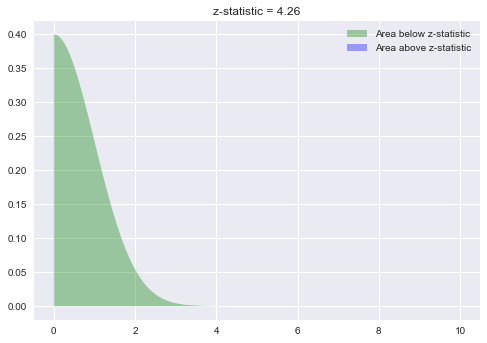

In [213]:
# Visualize the difference

plt.style.use('seaborn')
plt.fill_between(x=np.arange(0,4.26,0.01),
                 y1= stats.norm.pdf(np.arange(0,4.26,0.01)) ,
                 facecolor='green',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(4.26,10,0.01), 
                 y1= stats.norm.pdf(np.arange(4.26,10,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 4.26');

In [212]:
# So what is the effect size? -> Cohen's d

sd1 = df_no_drama.Rating.std()
sd2 = df_drama.Rating.std()
mu1 = df_no_drama.Rating.mean()
mu2 = df_drama.Rating.mean()


sigma_pooled = ((sd1**2 + sd2**2)/2)**0.5

effect_size = (mu2-mu1)/(sigma_pooled)

effect_size

0.3980553128668524

In [207]:
# Can we perform an ANOVA on our data for 3 main title types?
# sample sizes vary between all genres so choosing the top 3 and will take n=50

comedy=df_comedy.Rating.sample(n=50)
drama=df_drama.Rating.sample(n=50)
horror=df_horror.Rating.sample(n=50)

# Concat tables together to plot boxplots on same graph
df_cdh=df_ratings.loc[((df_ratings["Genre"]=="Comedy")|(df_ratings["Genre"]=="Drama")|(df_ratings["Genre"]=="Horror")),:]

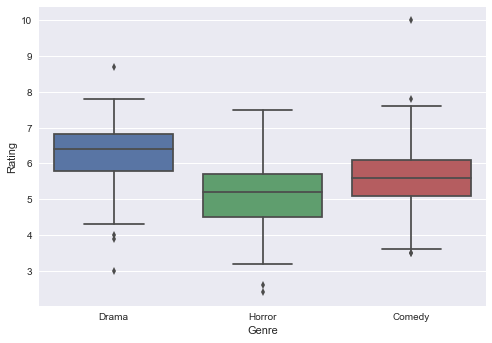

In [209]:
# Let's plot the different sample sizes to observe the variance and mean values

sns.boxplot(data=df_cdh,y="Rating",x="Genre")

In [187]:
# Now perform a on-way ANOVA test for these random samples

scipy.stats.f_oneway(comedy,drama,horror)

F_onewayResult(statistic=23.388731828542124, pvalue=1.517169028675953e-09)